In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
df = pd.read_excel('fromage.xls')
display(df)

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
5,Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
6,Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
7,Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
8,Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28
9,Comte,399,92.0,220.5,32.4,55.9,1.3,29.2,120,51


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fromages     29 non-null     object 
 1   calories     29 non-null     int64  
 2   sodium       29 non-null     float64
 3   calcium      29 non-null     float64
 4   lipides      29 non-null     float64
 5   retinol      29 non-null     float64
 6   folates      29 non-null     float64
 7   proteines    29 non-null     float64
 8   cholesterol  29 non-null     int64  
 9   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 2.4+ KB


#### nous avons les individues Fromages etant du type object donc qualitative nominal et les 9 variables suivant:Calories, cholesterol et magnesium etant des int donc quantitative discret et Sodium, calcium, Lipides, retinol, Folates et proteines etant float donc quantitative continue.

# Donnee aberrantes

<Axes: >

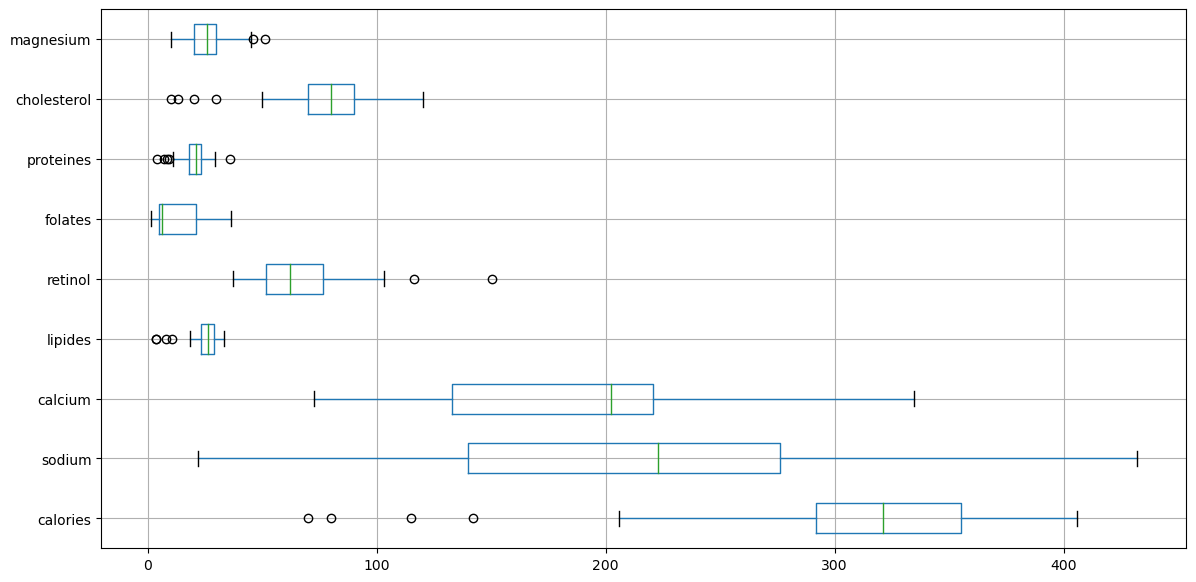

In [8]:
variables = ['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates', 'proteines', 'cholesterol', 'magnesium']
df.boxplot(column = variables, figsize = (14, 7), vert = False)

# calssification selon (lipides) et (proteines)

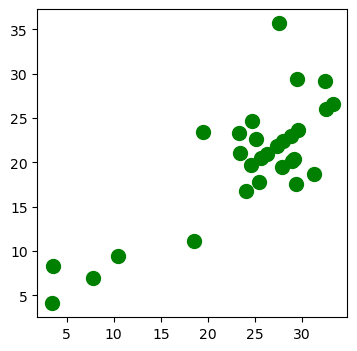

In [11]:
plt.figure(figsize = (4, 4))
lipides = df['lipides']
proteines = df['proteines']
plt.scatter(lipides, proteines, s = 100, c = 'green', label = 'distribution')
plt.show()

x = df[['lipides', 'proteines']].values

## Kmeans

### etiquette 

In [17]:
grp = 3

kmeans = KMeans(n_clusters = grp, init = 'random', n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 2 2 2 1 2 2 2 2 2 2 2 0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### centroids

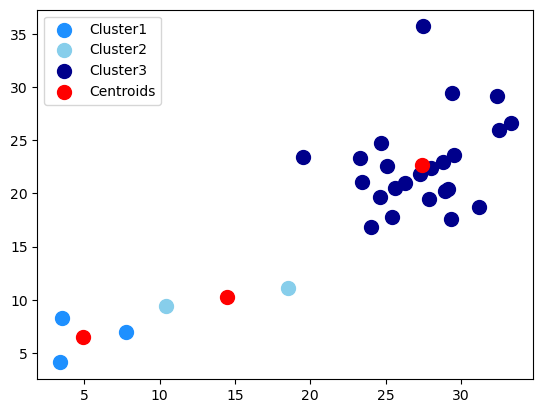

In [18]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'dodgerblue', label = 'Cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'skyblue', label = 'Cluster2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'darkblue', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

## nombre optimum de regroupement

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Le nombre optimum de regroupement est :  2


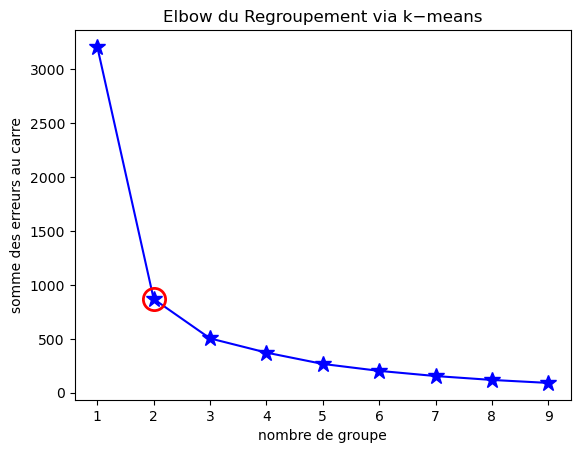

In [19]:
ssd = {}
r = range(1, 10)
for k in r:
    km = KMeans(n_clusters=k)
    KM = km.fit(x)
    ssd[k] = KM.inertia_
    
kl =KneeLocator(range(1,10), list(ssd.values()), curve = 'convex', direction = 'decreasing')
Elbow = kl.elbow
print('Le nombre optimum de regroupement est : ', Elbow)

plt.figure()
plt.plot(list(ssd.keys()), list(ssd.values()), 'b*-', markersize = 12)
plt.plot(Elbow, ssd[Elbow], marker='o', markersize = 16, markeredgewidth = 2, markeredgecolor = 'r', markerfacecolor = 'None')
plt.xlabel('nombre de groupe')
plt.ylabel('somme des erreurs au carre')
plt.title('Elbow du Regroupement via k−means')
plt.show()

### etiquette 

In [20]:
grp = 2

kmeans = KMeans(n_clusters = grp, init = 'random', n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### centroids

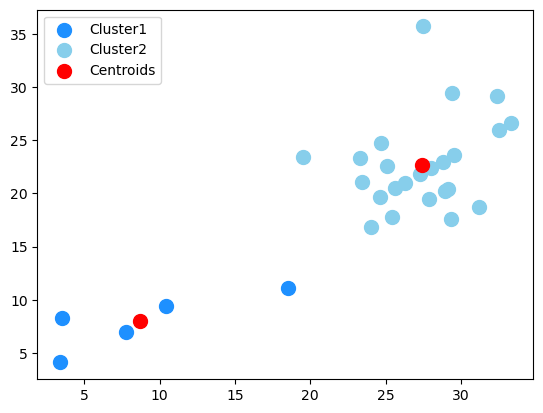

In [21]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'dodgerblue', label = 'Cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'skyblue', label = 'Cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()